<a href="https://colab.research.google.com/github/carmen-chan/A2/blob/master/Testing_area_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
##Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Import dataset from Github repository 
url = 'https://raw.githubusercontent.com/carmen-chan/A2/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'
telco = pd.read_csv(url, error_bad_lines=False)

# Check column names 
list(telco.head())

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [3]:
## Examining the first five rows of data
print(telco.head())

## For numeric attributes find the general mathematic summarising data
telco.describe()



   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [0]:
## Renaming Columns

telco.columns = ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner','Dependents', 'TenureMonths',  'PhoneService',  'MultipleLines',  'InternetService',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'ContractTerm', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'MonthlyChurn']

In [5]:
telco.dtypes

CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
TenureMonths          int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
ContractTerm         object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
MonthlyChurn         object
dtype: object

Data cleaning

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


telco = telco.apply(LabelEncoder().fit_transform)
telco

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ContractTerm,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MonthlyChurn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1
5,6551,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,1274,6104,1
6,1002,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,1075,1550,0
7,4770,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,140,2609,0
8,5604,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,1371,2646,1
9,4534,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,482,3022,0


In [7]:

ColumnstoScale = telco[['TotalCharges', 'MonthlyCharges', 'TenureMonths']]
ColumnstoScale

,TotalCharges,MonthlyCharges,TenureMonths
0,2505,142,1
1,1466,498,34
2,157,436,2
3,1400,266,45
4,925,729,2
5,6104,1274,8
6,1550,1075,22
7,2609,140,10
8,2646,1371,28
9,3022,482,62


In [0]:
scaler = preprocessing.StandardScaler()
scaled_telco = scaler.fit_transform(ColumnstoScale)
scaled_telco = pd.DataFrame(scaled_telco, columns=['TotalCharges_Normalised', 'MonthlyCharges_Normalised', 'TenureMonths_Normalised'])



NewTCN = scaled_telco[['TotalCharges_Normalised']]
NewMCN = scaled_telco[['MonthlyCharges_Normalised']]

NewTMN = scaled_telco[['TenureMonths_Normalised']]

In [0]:
telco = telco.assign(TotalCharges_Normalised = NewTCN)
telco = telco.assign(MonthlyCharges_Normalised = NewMCN)
telco = telco.assign(TenureMonths_Normalised = NewTMN)

# Import data packages for classifiers
# Create training and test set

In [0]:
## Import decision tree classifier package and metrics to evaluate on.

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [0]:
predictor_cols = ['Gender', 'SeniorCitizen', 'Partner','Dependents', 'TenureMonths_Normalised',  'PhoneService',  'MultipleLines',  'InternetService',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'ContractTerm', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges_Normalised', 'TotalCharges_Normalised']
X = telco[predictor_cols]
y = telco.MonthlyChurn

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



# Decision tree

In [13]:
from sklearn.tree import DecisionTreeClassifier 
dtC = DecisionTreeClassifier(criterion="entropy", max_depth=5)

dtC = dtC.fit(X_train,y_train)

y_pred_dtC = dtC.predict(X_test)

print('Weighted F1 Score', f1_score(y_test, y_pred_dtC, average='weighted') )
print("Accuracy of decision tree classifier:",metrics.accuracy_score(y_test, y_pred_dtC))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dtC))
print(classification_report(y_test,y_pred_dtC))
print(confusion_matrix(y_test,y_pred_dtC))

Weighted F1 Score 0.8007205711437146
Accuracy of decision tree classifier: 0.808374733853797
Mean Absolute Error: 0.19162526614620298
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1061
           1       0.64      0.51      0.57       348

    accuracy                           0.81      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.80      0.81      0.80      1409

[[961 100]
 [170 178]]


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


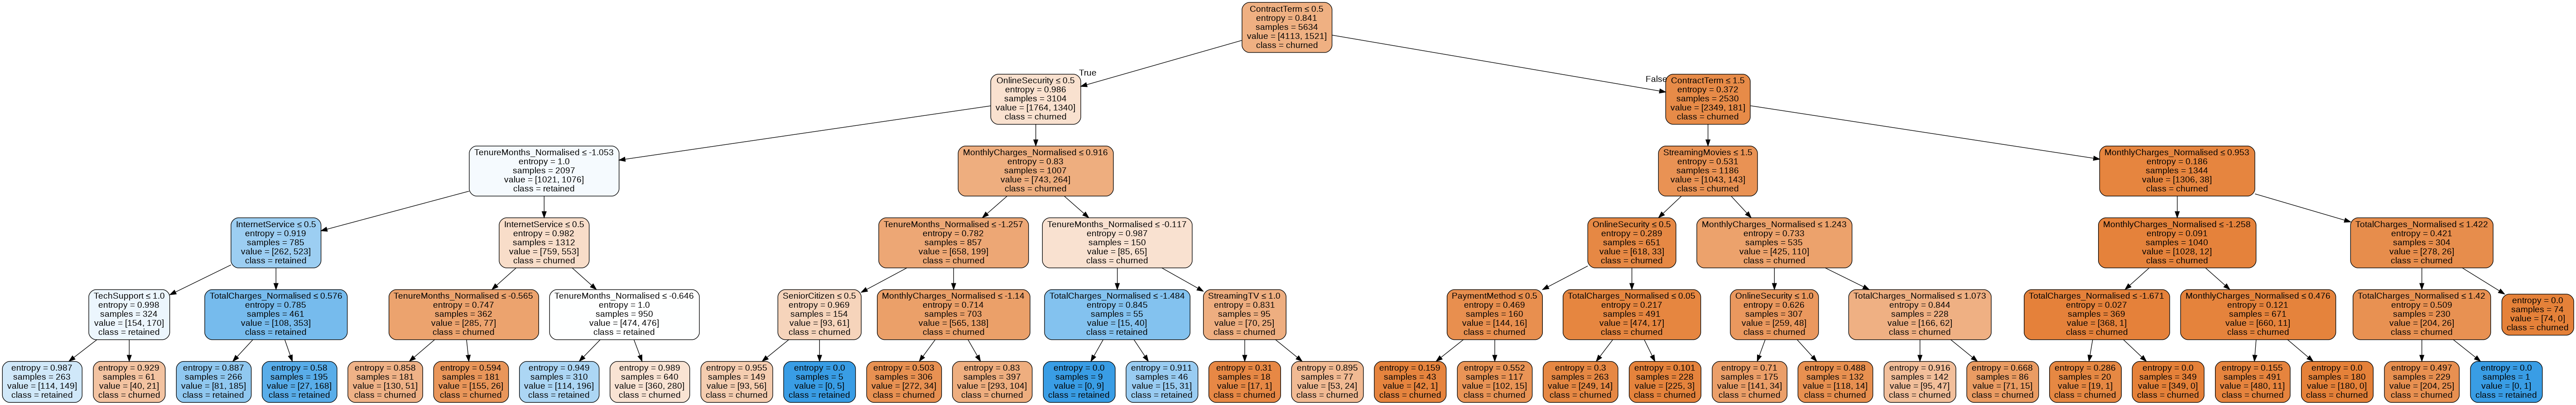

In [14]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = predictor_cols,class_names=['churned','retained'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('telcodtC.png')
Image(graph.create_png())

# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=500, max_depth=7, random_state=0 )
randomforest.fit(X_train, y_train)
y_pred_randomforest = randomforest.predict(X_test)


print('Weighted F1 Score', f1_score(y_test, y_pred_randomforest, average='weighted') )
print(confusion_matrix(y_test,y_pred_randomforest))
print(classification_report(y_test,y_pred_randomforest))
print("Accuracy of random forest classifier:", accuracy_score(y_test, y_pred_randomforest))

Weighted F1 Score 0.8202317922734982
[[965  96]
 [150 198]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1061
           1       0.67      0.57      0.62       348

    accuracy                           0.83      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.82      0.83      0.82      1409

Accuracy of random forest classifier: 0.8254080908445706


# Linear SVM

In [16]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred_SVM = svclassifier.predict(X_test)


print('Weighted F1 Score', f1_score(y_test, y_pred_SVM, average='weighted') )
print(confusion_matrix(y_test,y_pred_SVM))
print(classification_report(y_test,y_pred_SVM))
print("Accuracy of SVM classifier:", accuracy_score(y_test, y_pred_SVM))

Weighted F1 Score 0.8002769583555663
[[934 127]
 [151 197]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.61      0.57      0.59       348

    accuracy                           0.80      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409

Accuracy of SVM classifier: 0.8026969481902059


# Kernel SVM

In [22]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=1)
svclassifier.fit(X_train, y_train)

y_pred_SVK = svclassifier.predict(X_test)


print('Weighted F1 Score', f1_score(y_test, y_pred_SVK, average='weighted') )
print(confusion_matrix(y_test,y_pred_SVK))
print(classification_report(y_test,y_pred_SVK))
print("Accuracy of SVC classifier:", accuracy_score(y_test, y_pred_SVK))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Weighted F1 Score 0.7994513080933549
[[934 127]
 [152 196]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.61      0.56      0.58       348

    accuracy                           0.80      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409

Accuracy of SVC classifier: 0.8019872249822569


# K Nearest Neighbour 

In [92]:
from sklearn.neighbors import KNeighborsClassifier

scaler = preprocessing.StandardScaler()
knn_telco = scaler.fit_transform(predictor_cols)
knn_telco = pd.DataFrame(knn_telco)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
print(neigh.predict(y_test))

ValueError: ignored

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=19, activation= 'relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation= 'softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
training = telco[['Gender', 'SeniorCitizen', 'Partner','Dependents', 'TenureMonths_Normalised',  'PhoneService',  'MultipleLines',  'InternetService',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'ContractTerm', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges_Normalised', 'TotalCharges_Normalised']]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y3 = ohe.fit_transform(y).toarray()
X2 = y_binary
y2 = telco.MonthlyChurn

y_binary

In [0]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size = 0.1)

In [0]:

history = model.fit(X_train2, y_train2, epochs=100, batch_size=64)

# Timing Calculations 

In [23]:
import timeit
code_to_test = """
import pandas as pd
import numpy as np


## Import dataset from Github repository 
url = 'https://raw.githubusercontent.com/carmen-chan/A2/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'
telco = pd.read_csv(url, error_bad_lines=False)

telco.columns = ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner','Dependents', 'TenureMonths',  'PhoneService',  'MultipleLines',  'InternetService',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'ContractTerm', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'MonthlyChurn']

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


telco = telco.apply(LabelEncoder().fit_transform)
telco


ColumnstoScale = telco[['TotalCharges', 'MonthlyCharges', 'TenureMonths']]
ColumnstoScale

scaler = preprocessing.StandardScaler()
scaled_telco = scaler.fit_transform(ColumnstoScale)
scaled_telco = pd.DataFrame(scaled_telco, columns=['TotalCharges_Normalised', 'MonthlyCharges_Normalised', 'TenureMonths_Normalised'])


NewTCN = scaled_telco[['TotalCharges_Normalised']]
NewMCN = scaled_telco[['MonthlyCharges_Normalised']]
NewTMN = scaled_telco[['TenureMonths_Normalised']]

telco = telco.assign(TotalCharges_Normalised = NewTCN)
telco = telco.assign(MonthlyCharges_Normalised = NewMCN)
telco = telco.assign(TenureMonths_Normalised = NewTMN)

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


predictor_cols = ['Gender', 'SeniorCitizen', 'Partner','Dependents', 'TenureMonths_Normalised',  'PhoneService',  'MultipleLines',  'InternetService',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'ContractTerm', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges_Normalised', 'TotalCharges_Normalised']
X = telco[predictor_cols]
y = telco.MonthlyChurn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.tree import DecisionTreeClassifier 
dtC = DecisionTreeClassifier(criterion="entropy", max_depth=6)

dtC = dtC.fit(X_train,y_train)

y_pred_dtC = dtC.predict(X_test)
"""
speed = timeit.timeit(code_to_test, number=100)/100
print(speed)

0.2552287903000024


In [24]:
import timeit
code_to_test = """
import pandas as pd
import numpy as np


## Import dataset from Github repository 
url = 'https://raw.githubusercontent.com/carmen-chan/A2/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'
telco = pd.read_csv(url, error_bad_lines=False)

telco.columns = ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner','Dependents', 'TenureMonths',  'PhoneService',  'MultipleLines',  'InternetService',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'ContractTerm', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'MonthlyChurn']

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


telco = telco.apply(LabelEncoder().fit_transform)
telco


ColumnstoScale = telco[['TotalCharges', 'MonthlyCharges', 'TenureMonths']]
ColumnstoScale

scaler = preprocessing.StandardScaler()
scaled_telco = scaler.fit_transform(ColumnstoScale)
scaled_telco = pd.DataFrame(scaled_telco, columns=['TotalCharges_Normalised', 'MonthlyCharges_Normalised', 'TenureMonths_Normalised'])


NewTCN = scaled_telco[['TotalCharges_Normalised']]
NewMCN = scaled_telco[['MonthlyCharges_Normalised']]
NewTMN = scaled_telco[['TenureMonths_Normalised']]

telco = telco.assign(TotalCharges_Normalised = NewTCN)
telco = telco.assign(MonthlyCharges_Normalised = NewMCN)
telco = telco.assign(TenureMonths_Normalised = NewTMN)

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


predictor_cols = ['Gender', 'SeniorCitizen', 'Partner','Dependents', 'TenureMonths_Normalised',  'PhoneService',  'MultipleLines',  'InternetService',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'ContractTerm', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges_Normalised', 'TotalCharges_Normalised']
X = telco[predictor_cols]
y = telco.MonthlyChurn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=500, max_depth=7, random_state=0 )
randomforest.fit(X_train, y_train)
y_pred_randomforest = randomforest.predict(X_test)


"""
speed = timeit.timeit(code_to_test, number=100)/100
print(speed)

2.104208858419997


In [25]:
import timeit
code_to_test = """
import pandas as pd
import numpy as np


## Import dataset from Github repository 
url = 'https://raw.githubusercontent.com/carmen-chan/A2/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'
telco = pd.read_csv(url, error_bad_lines=False)

telco.columns = ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner','Dependents', 'TenureMonths',  'PhoneService',  'MultipleLines',  'InternetService',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'ContractTerm', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'MonthlyChurn']

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


telco = telco.apply(LabelEncoder().fit_transform)
telco


ColumnstoScale = telco[['TotalCharges', 'MonthlyCharges', 'TenureMonths']]
ColumnstoScale

scaler = preprocessing.StandardScaler()
scaled_telco = scaler.fit_transform(ColumnstoScale)
scaled_telco = pd.DataFrame(scaled_telco, columns=['TotalCharges_Normalised', 'MonthlyCharges_Normalised', 'TenureMonths_Normalised'])


NewTCN = scaled_telco[['TotalCharges_Normalised']]
NewMCN = scaled_telco[['MonthlyCharges_Normalised']]
NewTMN = scaled_telco[['TenureMonths_Normalised']]

telco = telco.assign(TotalCharges_Normalised = NewTCN)
telco = telco.assign(MonthlyCharges_Normalised = NewMCN)
telco = telco.assign(TenureMonths_Normalised = NewTMN)

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


predictor_cols = ['Gender', 'SeniorCitizen', 'Partner','Dependents', 'TenureMonths_Normalised',  'PhoneService',  'MultipleLines',  'InternetService',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'ContractTerm', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges_Normalised', 'TotalCharges_Normalised']
X = telco[predictor_cols]
y = telco.MonthlyChurn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred_SVM = svclassifier.predict(X_test)

"""
speed = timeit.timeit(code_to_test, number=100)/100
print(speed)

1.4056256319600016


In [26]:
import timeit
code_to_test = """
import pandas as pd
import numpy as np


## Import dataset from Github repository 
url = 'https://raw.githubusercontent.com/carmen-chan/A2/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'
telco = pd.read_csv(url, error_bad_lines=False)

telco.columns = ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner','Dependents', 'TenureMonths',  'PhoneService',  'MultipleLines',  'InternetService',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'ContractTerm', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'MonthlyChurn']

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


telco = telco.apply(LabelEncoder().fit_transform)
telco


ColumnstoScale = telco[['TotalCharges', 'MonthlyCharges', 'TenureMonths']]
ColumnstoScale

scaler = preprocessing.StandardScaler()
scaled_telco = scaler.fit_transform(ColumnstoScale)
scaled_telco = pd.DataFrame(scaled_telco, columns=['TotalCharges_Normalised', 'MonthlyCharges_Normalised', 'TenureMonths_Normalised'])


NewTCN = scaled_telco[['TotalCharges_Normalised']]
NewMCN = scaled_telco[['MonthlyCharges_Normalised']]
NewTMN = scaled_telco[['TenureMonths_Normalised']]

telco = telco.assign(TotalCharges_Normalised = NewTCN)
telco = telco.assign(MonthlyCharges_Normalised = NewMCN)
telco = telco.assign(TenureMonths_Normalised = NewTMN)

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


predictor_cols = ['Gender', 'SeniorCitizen', 'Partner','Dependents', 'TenureMonths_Normalised',  'PhoneService',  'MultipleLines',  'InternetService',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'ContractTerm', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges_Normalised', 'TotalCharges_Normalised']
X = telco[predictor_cols]
y = telco.MonthlyChurn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=1)
svclassifier.fit(X_train, y_train)

y_pred_SVC = svclassifier.predict(X_test)

"""
speed = timeit.timeit(code_to_test, number=100)/100
print(speed)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

0.9498196190299996
